# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

611

In [3]:
#hold api key
api_key = api_keys.api_key

#base url for api calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#sets call counter

record = 1

#prints log file header
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#loops throughh cities
#create try catch so it keeps going if there is an error
for city in cities:  

    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        #add one to counter
        record= record + 1
        
        #wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    #skips if there is no record
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=saint-philippe
Processing Record 2 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=avarua
City not found. Skipping...
Processing Record 3 | Sharjah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=sharjah
Processing Record 4 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=punta arenas
City not found. Skipping...
Processing Record 5 | Keetmanshoop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=keetmanshoop
Processing Record 6 | Saravan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=saravan
Processin

Processing Record 56 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=albany
Processing Record 57 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=rikitea
Processing Record 58 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=evensk
Processing Record 59 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=walvis bay
Processing Record 60 | Bukama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=bukama
Processing Record 61 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=ostrovnoy
Processing Record 62 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=moun

Processing Record 112 | Sukhobuzimskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=sukhobuzimskoye
Processing Record 113 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=narsaq
Processing Record 114 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=palmer
Processing Record 115 | Zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=zheleznodorozhnyy
Processing Record 116 | Luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=luganville
Processing Record 117 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=riyadh
Processing Record 118 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870de

Processing Record 167 | Labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=labuhan
Processing Record 168 | Irupi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=irupi
Processing Record 169 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=saint anthony
Processing Record 170 | Capreol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=capreol
Processing Record 171 | Masyaf
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=masyaf
Processing Record 172 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=bredasdorp
Processing Record 173 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73

Processing Record 222 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=los llanos de aridane
City not found. Skipping...
Processing Record 223 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=upernavik
Processing Record 224 | Robertson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=robertson
City not found. Skipping...
Processing Record 225 | Acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=acapulco
Processing Record 226 | Dumas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=dumas
Processing Record 227 | Minab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=minab
Processing Record 228 | Juba
http://api.openweathermap.o

Processing Record 277 | Portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=portland
Processing Record 278 | Atasu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=atasu
Processing Record 279 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=pisco
Processing Record 280 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=sola
Processing Record 281 | Lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=lasa
Processing Record 282 | Kuhdasht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=kuhdasht
City not found. Skipping...
Processing Record 283 | Saint-Georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7b

City not found. Skipping...
Processing Record 333 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=salalah
Processing Record 334 | Yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=yumen
Processing Record 335 | Fez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=fez
Processing Record 336 | Tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=tazovskiy
City not found. Skipping...
Processing Record 337 | Coahuayana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=coahuayana
Processing Record 338 | Shreveport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=shreveport
Processing Record 339 | Wanlaweyn
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 388 | Kaduqli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=kaduqli
City not found. Skipping...
Processing Record 389 | Boksitogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=boksitogorsk
Processing Record 390 | Inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=inta
Processing Record 391 | Lere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=lere
Processing Record 392 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=hambantota
Processing Record 393 | Baisha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=baisha
Processing Record 394 | Buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12

Processing Record 443 | Igarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=igarka
Processing Record 444 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=talcahuano
Processing Record 445 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=muros
Processing Record 446 | Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=laguna
Processing Record 447 | Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=takoradi
Processing Record 448 | Nayoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=nayoro
Processing Record 449 | Stanceni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=stanceni

Processing Record 499 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=luderitz
Processing Record 500 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=iquitos
Processing Record 501 | Srandakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=srandakan
Processing Record 502 | Nongstoin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=nongstoin
Processing Record 503 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=baruun-urt
Processing Record 504 | Buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7baf73a4f0&q=buchanan
Processing Record 505 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=870debc6b12817711fe11d7b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# dict of lists
weatherpy_dict = { "City": city_name, "Cloudiness":cloudiness, "Country":country, "Date":date, 
                    "Humidity": humidity, "Lat":lat, "Lng":lng, "Max Temp": max_temp, "Wind Speed":wind_speed
                 }

# convert dict to dataframe
weather_data = pd.DataFrame(weatherpy_dict)

# prints data
weather_data.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max Temp      546
Wind Speed    546
dtype: int64

In [10]:
# saves dataframe in csv file
weather_data.to_csv('weather_data.csv')

# pritns top 5 of dataframe
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Philippe,90,CA,1547164800,66,45.36,-73.48,15.8,19.46
1,Avarua,75,CK,1547164800,62,-21.21,-159.78,84.2,21.92
2,Sharjah,40,AE,1547161200,60,25.36,55.39,69.8,6.93
3,Punta Arenas,0,CL,1547164800,54,-53.16,-70.91,57.2,28.86
4,Keetmanshoop,0,NA,1547164800,34,-26.57,18.15,66.2,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

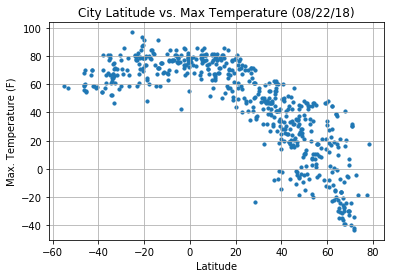

In [21]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

#sets graph style

plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# saves the graph in a png
plt.savefig("Latitude_vs_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

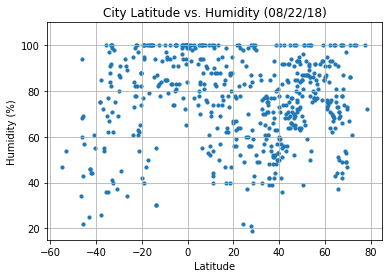

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

#sets graph style
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim(15, 110)

#saves graph
plt.savefig("Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

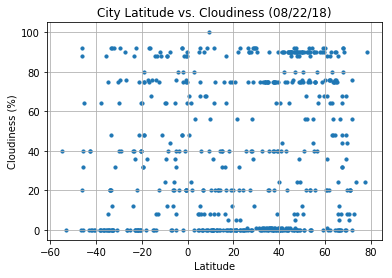

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

#sets graph style
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#saves graph
plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

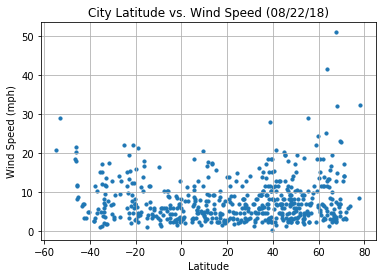

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

#sets graph style
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#saves graph
plt.savefig("Latitude_vs_WindSpeed.png")

plt.show()